<a href="https://colab.research.google.com/github/Sandoval-G-98/SOA-AppJava/blob/feature%2FTP3-ejercicio-1/HPC/Cuaderno_2_Miercoles_grupo7_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduccicón

El deep learning es un tipo de machine learning que entrena a una computadora para que realice tareas como las hacemos los seres humanos, como el reconocimiento del habla, la identificación de imágenes o hacer predicciones. 

En este cuaderno se abordará el tema de deep learning en la problemática de clasificación de imagenes. Para eso utilizamos la biblioteca TensorFlow que nos permite trabajar con el aprendizaje automático.


# 2. Armado del ambiente

No se necesita instalar nada para el desarrollo del ejercicio.

# 3. Desarrollo

En un principio debemos importar todas las librerias necesarias para el desarrollo del ejercicio.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt

3.1 Para poder entrenar a nuestra red, necesitamos datos de entrenamiento y de prueba. Dichos datos se toman de un repo de github abierto que creó una marca de ropa llamada Zalando.

In [ ]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#Obtenemos en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']
#Etiquetas de las 10 categorias posibles
nombres_clases = metadatos.features['label'].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZ7PVML/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZ7PVML/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


3.2 En la busqueda de como hacer el entrenamiento más rápido, se encontró que podemos agregar los datos en caché.

In [ ]:
#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

3.3 Pequeña muestra de cómo se ven las imágenes de la base de datos de Zalando. (Son imágenes de 28x28 , por eso se realiza el reshape)

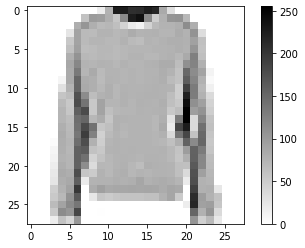

In [ ]:
#Mostrar una imagen de los datos de pruebas
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar



#Dibujar dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

3.4 Se crea el modelo para nuestra red neuronal. 


*   La red será de tipo secuencial
*   Las imágenes de la base de datos son de 28x28 pixeles, por lo que hacemos el reshape y le indicamos que las imágenes estan en blanco y negro
*   Se agregan dos capas ocultas de 50 neuronas para tener un mejor resultado en el entrenamiento.
*   Se utiliza la funcion de activación relu para que nuestra red sea también capaz de solucionar problemas no lineales junto con las 50 neuronas.  
*   Nuestra última capa de salida con 10 neuronas se utiliza la funcion de activación softmax ya que es la más común para la solución de problemas de clasificación.


In [ ]:
#Crear el modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1 -> Porque las imagenes estan en blanco y negro
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Problemas de clasificacion
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

#Los numeros de datos en entrenamiento y pruebas (60k y 10k)
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red no se vaya a aprender el orden de las cosas
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

3.5 Comenzamos el entrenamiento indicandole que serán 5 vueltas a los datos.
En la parte de accuracy podremos ver la precisión en cada vuelta al igual que la perdida.

In [ ]:


#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 1.8371 - accuracy: 0.7021
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6457 - accuracy: 0.7785
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6070 - accuracy: 0.7926
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5657 - accuracy: 0.8073
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5401 - accuracy: 0.8122


3.6 Graficaremos las imágenes del set de prueba y en un costado veremos el porcentaje de predicción correcto (azul) y si se equivoco (rojo)

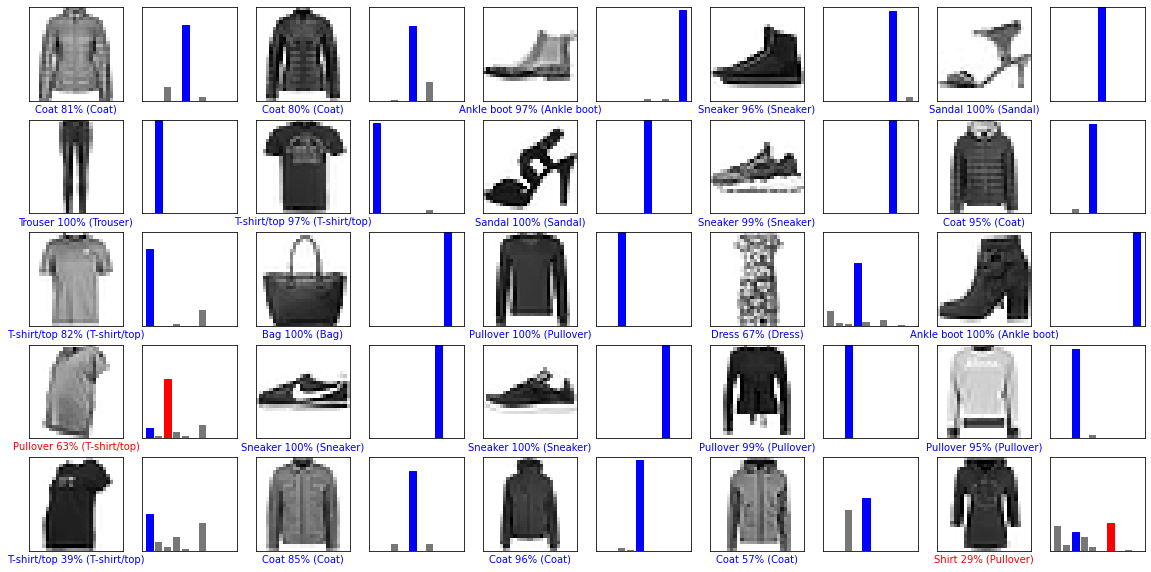

In [ ]:
#Printear varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue' # Prediccion correcta
  else:
    color = 'red' # Prediccion incorrecta
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

3.7 Pruebas

Podemos tomar cualquier valor del set de datos de prueba de arriba y que nos imprima la predicción de la red.

In [ ]:
#Prediccion 

imagen = imagenes_prueba[10]
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print(f"Prediccion: {nombres_clases[np.argmax(prediccion[0])]}" )

Prediccion: T-shirt/top


 ---
# 4. Tabla de pasos 


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  tfds.load             | Carga la base de datos con imagenes de la ropa de Zalando. 
CPU      |  datos_entrenamiento.cache() , datos_pruebas.cache()          | Pasa los datos a caché.
CPU      |  tf.keras.layers.Flatten(input_shape=(28,28,1)) | Se indica los pixeles de la imagen y el canal (1 - Blanco y Negro)
CPU      |  tf.keras.layers.Dense(50, activation=tf.nn.relu)   | Se indican la cantidad de neuronas y la función de activación relu
CPU      |  tf.keras.layers.Dense(10, activation=tf.nn.softmax)            | Se indican la cantidad de neuronas de salida y la función de activación softmax
CPU      |  print()               | Imprime datos por pantalla.
CPU      |  modelo.predict(imagen)           | Realiza la predicción de una imagen indicada.
# CPU      |  plt.imshow            | Muestra la imagen resultado.

# 5. Conclusiones

Colab es una plataforma que nos permite desarrollar en código Python. Se pueden realizar las importaciones de modulos y bibliotecas propios de Python para la resolución de problemas. 

Una de las desventajas que se puede tener con esta plataforma es que no siempre se tendrán los recursos disponibles ya que colab tiene una forma dinámica en la prioización de recursos. 

Lecciones aprendida

*   Deep learning es una disciplina de Machine Learning que nos permite entrenar redes neuronales para la resolución de problemas complejos como pueden ser el reconocimiento y la clasificación de imagenes mostrada en este cuaderno.
*   Se tuvo un conocimiento más profundo en la plataforma Colab
*   Se aprendió sobre la biblioteca TensorFlow, muy importente para el deep learning.
*   Se investigó sobre como trabajan las redes neuronales y la forma en que se pueden entrenar.
*   Se mejoró el entendimiento del lenguaje de programción Python

# 6. Bibliografía


[1] Python: [Documentación](https://docs.python.org/3/)

[2] Introducción a Python: [Repo Unlam](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[3] Numpy: [Documentación](https://numpy.org/doc/stable/)

[4] TensorFlow: [Página oficial](https://www.tensorflow.org/) 

[5] Zolanda Research: [Repo con imagenes](https://github.com/zalandoresearch/fashion-mnist) 

[6] Matplotlib: [Documentación](https://matplotlib.org/) 
